# Assignment 6

## METROPOLIS-HASTING

In [23]:
# Import 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as ss

In [44]:
lambdas = np.arange(0.1, 1, 0.1)


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

### Find $\lambda^*$

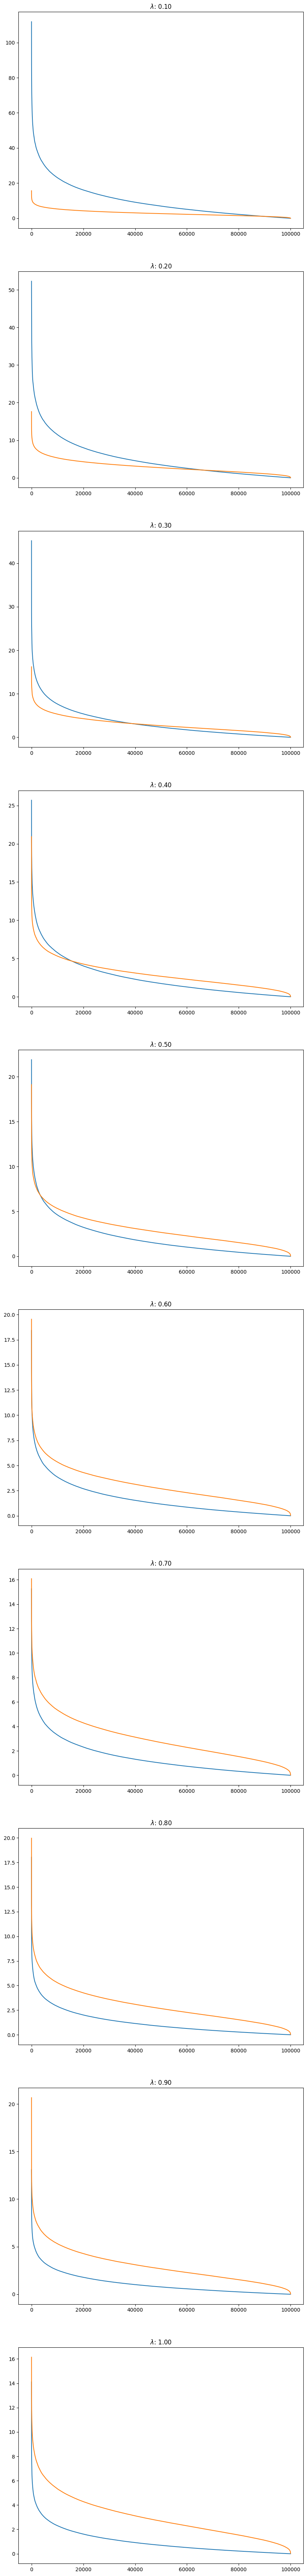

In [48]:
lambdas = np.linspace(0.1, 1, 10)
N = 100000
fig, axs = plt.subplots(10, 1, figsize = [10, 90])

for i,lam in enumerate(lambdas):
    exps = np.random.exponential(1/lam, size = N)
    exps = np.sort(exps)[::-1]

    gammas = np.random.gamma(3, 1, size = N)
    gammas = np.sort(gammas)[::-1]

    axs[i].plot(np.arange(N), exps)
    axs[i].plot(np.arange(N), gammas)
    axs[i].set_title(f"$\lambda$: {lam:.2f}")

In [49]:
N1 = 10000

lambdas = np.arange(0.1,1,0.05)
A = np.zeros(20)

for j, lam in enumerate(lambdas):
    theta = np.zeros(N1)
    theta[0] = lam
    for i in range(N1-1):
        exp = np.random.exponential(1/lam)
        new = ss.gamma.pdf(exp,3,1)
        old = ss.gamma.pdf(theta[i],3,1)
        r = min(1,(new*ss.expon.pdf(exp,1/lam)/(old*ss.expon.pdf(theta[i],1/lam))))
        A[j] += r

        z = np.random.uniform(0,1)
        if z < r :
            theta[i+1] = exp
        else:
            theta[i+1] = theta[i]

print(A/N1)

/tmp/ipykernel_12000/1931287712.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  r = min(1,(new*ss.expon.pdf(exp,1/lam)/(old*ss.expon.pdf(theta[i],1/lam))))
/tmp/ipykernel_12000/1931287712.py:13: RuntimeWarning: invalid value encountered in double_scalars
  r = min(1,(new*ss.expon.pdf(exp,1/lam)/(old*ss.expon.pdf(theta[i],1/lam))))


[0.03695353 0.05577258 0.07195151 0.09342851 0.11036895 0.1280415
 0.14381299 0.17074364 0.1918438  0.20682834 0.23411042 0.24983462
 0.26364047 0.27235873 0.27207095 0.26861685 0.26046273 0.24296283
 0.         0.        ]


In [ ]:
NR_SIMULATIONS = int(1e6)
thetas = np.zeros(NR_SIMULATIONS +1)

thetas[0] = np.random.exponential(1/0.85)
gammas = list()

for i in range(NR_SIMULATIONS):
    phi = np.random.exponential(1/0.85)
    pi_y = ss.gamma.pdf(phi, 3, 1)
    pi_x = ss.gamma.pdf(thetas[i], 3, 1)
    
    q_x = ss.expon.pdf(phi, 1/0.85)
    q_y = ss.expon.pdf(thetas[i], 1/0.85)
    
    ratio = (pi_y * q_x)/ (pi_x * q_y)
    alpha = min(1, ratio)
    
    thetas[i+1] = thetas[i]
    if np.random.uniform(0,1) <= alpha:
        thetas[i+1] = phi
        gammas.append(phi)
    
    
gammas = np.array(gammas)

/tmp/ipykernel_12000/3229071214.py:15: RuntimeWarning: invalid value encountered in double_scalars
  ratio = (pi_y * q_x)/ (pi_x * q_y)
/tmp/ipykernel_12000/3229071214.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = (pi_y * q_x)/ (pi_x * q_y)


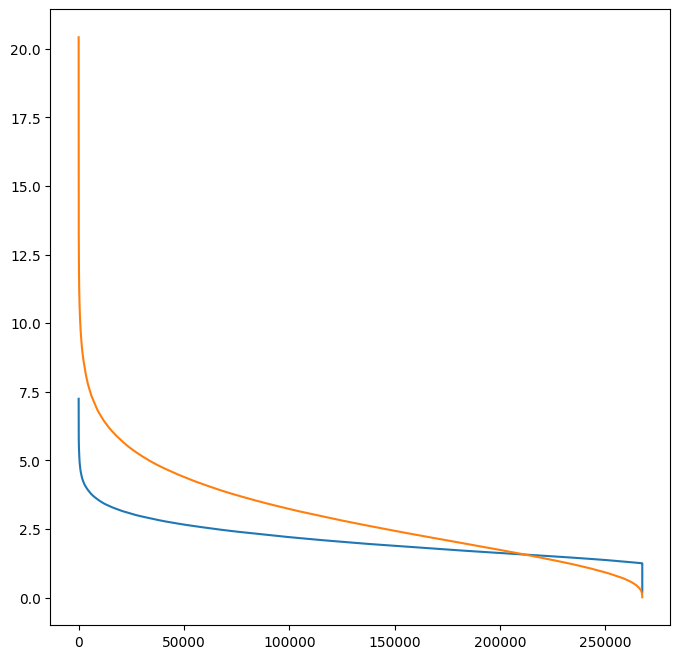

In [39]:
NR_SIMULATIONS = len(gammas)
x_axis = np.arange(len(gammas))
gammas = np.sort(gammas)[::-1]
gammas_real = np.sort(np.random.gamma(3, 1, size = NR_SIMULATIONS))[::-1]

fig, axs = plt.subplots(1, 1, figsize =[8,8])
axs.plot(x_axis, thetas)
axs.plot(np.arange(NR_SIMULATIONS), gammas_real)

In [ ]:
#accetto tutti i thtea 